In [1]:
import cv2
from mtcnn import MTCNN
from keras_facenet import FaceNet
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

In [2]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

In [3]:
def detect_and_align_face(image_rgb):
    detector = MTCNN()
    # Detect faces
    results = detector.detect_faces(image_rgb)
    if results:
        # Get the bounding box of the first face
        x, y, width, height = results[0]['box']
        # Crop the face region with a margin
        margin = 0.2  # Adjust margin as needed
        x_min, y_min = max(x - int(margin * width), 0), max(y - int(margin * height), 0)
        x_max, y_max = min(x + width + int(margin * width), image_rgb.shape[1]), min(y + height + int(margin * height), image_rgb.shape[0])
        # Crop the face with margin
        face = image_rgb[y_min:y_max, x_min:x_max]
        # Resize the face to a standard size (160x160)
        aligned_face = cv2.resize(face, (160, 160))
        return aligned_face
    else:
        return None

In [4]:
def get_face_embedding(face):
    embedder = FaceNet()
    # Get the face embedding
    embedding = embedder.embeddings([face])[0]
    return embedding

In [5]:
def is_same_person(embedding1, embedding2, threshold=0.5):
    # Calculate the cosine distance between embeddings
    distance = cosine(embedding1, embedding2)
    # Check if the distance is below the threshold
    return distance < threshold

In [24]:
def compare_faces(image_path1, image_path2):
    # Preprocess both images
    image1_rgb = preprocess_image(image_path1)
    image2_rgb = preprocess_image(image_path2)

    # Detect and align faces
    face1 = detect_and_align_face(image1_rgb)
    face2 = detect_and_align_face(image2_rgb)

    if face1 is not None and face2 is not None:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(face1)
        plt.title('Face 1')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(face2)
        plt.title('Face 2')
        plt.axis('off')
        plt.show()
        # Get embeddings for the faces
        embedding1 = get_face_embedding(face1)
        embedding2 = get_face_embedding(face2)
        # Compare the embeddings
        compare =  is_same_person(embedding1, embedding2)
        
        if compare == True: 
            result = ("They are the same Person.")
        else :
            result = ("They are not the same Person!")
        
        return result

In [17]:
image_path_id = "C:\\Users\\NewVision\\Downloads\\id.jpg"
image_path_selfie = "C:\\Users\\NewVision\\Downloads\\jo.jpg"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━

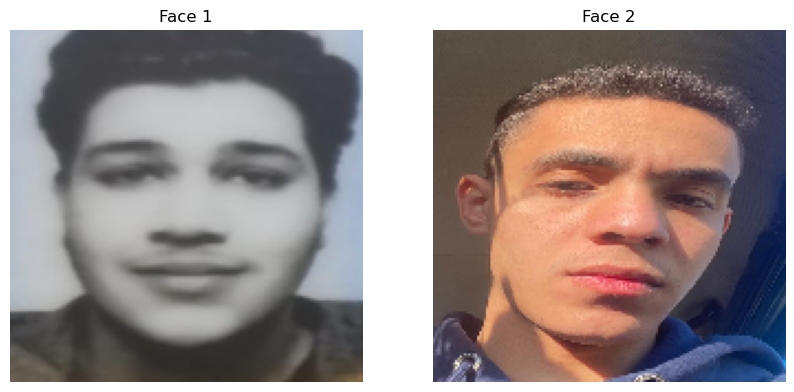

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


'they are not the same Person'

In [23]:
result = compare_faces(image_path_id, image_path_selfie)
result